# Marie Tabourin

In [1]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)##pour ne pas compréser les valeurs réels et affichage
import pandas as pd ##gère data frame, lire fichier txt, exel...
import warnings 
import matplotlib.pyplot as plt ##affichage graph
warnings.filterwarnings('ignore') 

## Réduction de dimensions et Visualisation des données

### Importation des données

In [2]:
data = pd.read_csv('villes.csv', sep=';')

In [3]:
data.head()

,ville,janv,fev,mars,avril,mai,juin,juil,aout,sept,oct,nov,dec
0,ajac,7.7,8.7,10.5,12.6,15.9,19.8,22.0,22.2,20.3,16.3,11.8,8.7
1,ange,4.2,4.9,7.9,10.4,13.6,17.0,18.7,18.4,16.1,11.7,7.6,4.9
2,ango,4.6,5.4,8.9,11.3,14.5,17.2,19.5,19.4,16.9,12.5,8.1,5.3
3,besa,1.1,2.2,6.4,9.7,13.6,16.9,18.7,18.3,15.5,10.4,5.7,2.0
4,biar,7.6,8.0,10.8,12.0,14.7,17.8,19.7,19.9,18.5,14.8,10.9,8.2


### Question 2

In [4]:
X = data.iloc[:, 1:13].values ##permet de sélectionner les lignes, .values pour que ce soit un objet numpy
labels = data.iloc[:, 0].values ##permet de sélection villes

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
#Normalisation
ss=StandardScaler() ##création de l'objet
##pour chaque valeur on va enlever la moyenne et divisé par l'écart-type
ss.fit(X) #fit calcul moyenne et écart-type de chaque variables X (mois) et stock
Xnorm=ss.transform(X)

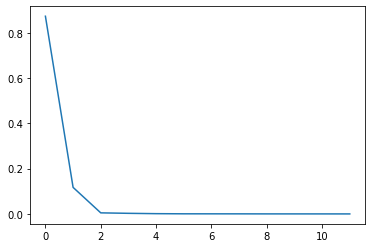

In [7]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit(Xnorm).transform(Xnorm)
pca.explained_variance_
pca.explained_variance_ratio_ 
# on observe que le premier axe donne 87% de l'information et le deuxième donne 12% de l'information
# Il faut donc les 2 premiers axes pour avoir un minimum de 90% de l'information

plt.plot(pca.explained_variance_ratio_)
plt.show()
# On observe avec ce graphique qu'il faut bien 2 axes

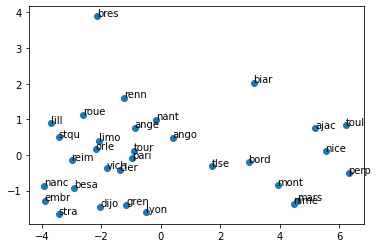

In [10]:
import matplotlib 
plt.scatter(X_pca[:, 0], X_pca[:, 1]) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

In [73]:
pca.components_ 
# On dit qu'une composante (les mois) participe à l'axe si la valeur absolue de son poids est supérieur à |1/racine(12)| = 0,288
# Premier axe: On observe que chaque mois participe autant au premier axe donc il semble représenter une moyenne des valeurs, c'est à dire la moyenne des températures
# Second axe: On observe que les mois de janvier, février et décembre (hiver) participe avec un poid positif et mai, juin, juillet et aout (été) participe avec un poid négatif
# Donc pour le second axe, plus la valeur est elevée plus la ville à des valeurs de température élevées en hiver par rapport aux autres villes,
# et plus la valeurs est basse, plus la ville a des valeurs de température élevées en été par rapport aux autres villes

array([[ 0.27151028,  0.28846164,  0.3010811 ,  0.30354174,  0.28353089,
         0.27841907,  0.27290295,  0.28757774,  0.30472022,  0.3038548 ,
         0.29242808,  0.2729549 ],
       [ 0.39933494,  0.29907184,  0.12943051, -0.11530598, -0.32314291,
        -0.35846763, -0.38879639, -0.3010133 , -0.11231622,  0.12249226,
         0.26269461,  0.38693688],
       [ 0.04409365,  0.03948181,  0.53570204,  0.5113345 ,  0.23821244,
         0.05381216, -0.22933643, -0.25421533, -0.27486626, -0.3536259 ,
        -0.25411937, -0.07756511],
       [-0.1558089 ,  0.07307363,  0.54015114, -0.07666717, -0.3189685 ,
        -0.30424435, -0.06181967,  0.16879935,  0.35726159,  0.2857622 ,
        -0.15061539, -0.46275418],
       [ 0.2584192 ,  0.15926626,  0.1946403 , -0.18824458, -0.55146666,
         0.31127222,  0.43376098,  0.16314861, -0.21810887, -0.32453688,
        -0.24260357,  0.08371863],
       [ 0.43776933,  0.37595552, -0.38220213,  0.1890633 ,  0.17724002,
        -0.37334457,  

 ### Question 3

In [74]:
dataC = pd.read_csv('crimes.csv', sep=';')

In [75]:
dataC.head()

,Etat,Meutre,Rapt,Vol,Attaque,Viol,Larcin,Auto_Theft
0,Alabama,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,Alaska,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,Arizona,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,Arkansas,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,California,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5


In [76]:
XC = dataC.iloc[:, 1:8].values ##permet de sélectionner les lignes, .values pour que ce soit un objet numpy
labelsC = dataC.iloc[:, 0].values ##permet de sélection les états

In [77]:
#Normalisation
ssC=StandardScaler() ##création de l'objet
##pour chaque valeur on va enlever la moyenne et divisé par l'écart-type
ssC.fit(XC) #fit calcul moyenne et écart-type de chaque variables X (mois) et stock
XnormC=ssC.transform(XC)

In [78]:
pcaC = PCA()
X_pcaC = pcaC.fit(XnormC).transform(XnormC)
pcaC.explained_variance_
pcaC.explained_variance_ratio_
# Pour avoir au minimum 90% d'information il faudrait 4 axes
# Il faut donc ne pas oublier qu'avec les 2 premiers axes nous gardons que 75% de l'information 

array([0.58785136, 0.17696026, 0.10368809, 0.04520458, 0.03685349,
       0.03171992, 0.01772229])

In [79]:
import matplotlib 
plt.scatter(X_pcaC[:, 0], X_pcaC[:, 1]) 
for label, x, y in zip(labelsC, X_pcaC[:, 0], X_pcaC[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

In [80]:
pcaC.components_ 
# On dit qu'une composante (les crimes) participe à l'axe si la valeur absolue de son poids est supérieur à |1/racine(7)| = 0,38
# Premier axe: On observe que tous les crimes participe mais moins le meurtre, l'auto-theft et larcin qui ne permette pas de bien discriminer les états car ils sont présents un peu partout.
# Second axe: On observe que meutre participe avec un poids negatif et que Larcin et Auto_Theft participe avec des poids positifs
# Pour le second axe, quand les valeurs sont élevées, cela signifie que l'état a beaucoup de Larcin et Auto-Theft par rapport au autres états,
# et quand les valeurs sont basses, cela signifie que l'état a beaucoup de Meurtre et Attaque par rapport aux autres états

# On observe ici, qu'il est difficile de séparer les villes

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093],
       [ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
        -0.53923144,  0.56838373],
       [-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
        -0.23488987,  0.41923832],
       [ 0.53812286,  0.18847069, -0.51997683, -0.50665138,  0.10103335,
         0.03009857,  0.36975317],
       [-0.25911677,  0.77327066,  0.11438481, -0.17236294, -0.53598716,
        -0.03940645,  0.05729763],
       [-0.26759277,  0.29648548,  0.00390268, -0.19174459,  0.64811708,
        -0.60169004, -0.14704626]])

### Question 4

In [31]:
dataS = pd.read_csv('50_Startups.csv', sep=';')

In [32]:
dataS.head()

,Id,Depenses R&D,Depenses Administration,Depenses Marketing Spend,Benefice
0,1,165349.20,136897.80,471784.10,192261.83
1,2,162597.70,151377.59,443898.53,191792.06
2,3,153441.51,101145.55,407934.54,191050.39
3,4,144372.41,118671.85,383199.62,182901.99
4,5,142107.34,91391.77,366168.42,166187.94


In [33]:
XS = dataS.iloc[:, 1:5].values ##permet de sélectionner les lignes, .values pour que ce soit un objet numpy
labelsS = dataS.iloc[:, 0].values 

In [34]:
#Normalisation
ssS=StandardScaler() ##création de l'objet
##pour chaque valeur on va enlever la moyenne et divisé par l'écart-type
ssS.fit(XS) #fit calcul moyenne et écart-type de chaque variables X (mois) et stock
XnormS=ssS.transform(XS)

In [36]:
pcaS = PCA()
X_pcaS = pcaS.fit(XnormS).transform(XnormS)
pcaS.explained_variance_
pcaS.explained_variance_ratio_

# Les 2 premiers axes permettent de conserver environ 91% de l'information

array([0.66804393, 0.25484695, 0.07063561, 0.00647351])

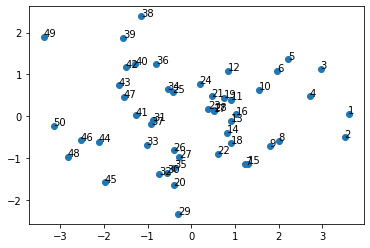

In [37]:
import matplotlib 
plt.scatter(X_pcaS[:, 0], X_pcaS[:, 1]) 
for label, x, y in zip(labelsS, X_pcaS[:, 0], X_pcaS[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

In [39]:
pcaS.components_ 
# On dit qu'une composante (les dépenses) participe à l'axe si la valeur absolue de son poids est supérieur à |1/racine(4)| = 0,5
# Pour l'axe 1: On observe que toutes les dépenses participent sauf les dépences administratives qui participe très peu. Donc plus la startups à de dépences plus la valeur sur cet axe sera élevé.

# Pour l'axe 2: On observe que seul les dépenses administratives participe vraiment à cet axe. Plus la valeur sur l'axe est faible plus les dépenses administratives sont élevées dans la startups.


array([[ 0.59347855,  0.14737886,  0.52064694,  0.59580992],
       [-0.04048087, -0.95051314,  0.30797098,  0.00632069],
       [-0.39681837,  0.2723039 ,  0.79581463, -0.36751167],
       [ 0.69905629, -0.02558964,  0.0275629 , -0.71407686]])

## Clustering

### Question 1 : KMeans

In [13]:
import matplotlib 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X_pca)
clustering =  kmeans.labels_


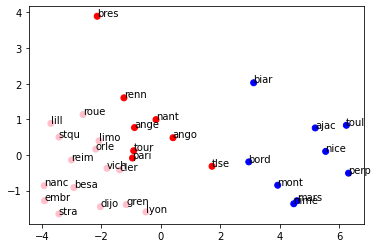

In [14]:
colors = ['red','yellow','blue','pink']     
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show() 

### Question 2

In [20]:
from sklearn.cluster import AgglomerativeClustering

#ward: minimise la variance des clusters qui sont combinés
aggloClus = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(X_pca)
clustering =  aggloClus.labels_


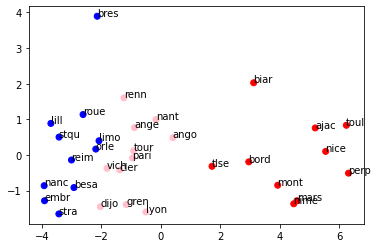

In [21]:
colors = ['red','yellow','blue','pink']     
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show() 

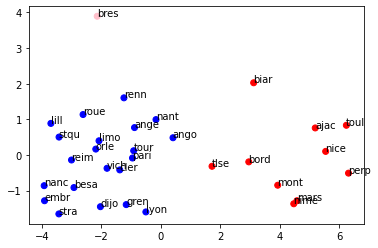

In [22]:
#average: utilise la moyenne des distances de chaque observation dans les groupes
aggloClus = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X_pca)
clustering =  aggloClus.labels_

colors = ['red','yellow','blue','pink']     
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors)) 
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]): 
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points') 
plt.show()

In [ ]:
# On peut observer des différences entre les différentes techniques de clustering

### Question 3

In [23]:
from sklearn import metrics 
for i in np.arange(2, 6): 
    clustering = KMeans(n_clusters=i).fit_predict(X_pca) 
    print(metrics.silhouette_score(X_pca, clustering,metric='euclidean')) 
    print() 

0.625557719180767

0.37382458484049585

0.36151471170277016

0.3188267694089411



In [ ]:
# La meilleure partition qui correspond à un indice maximal pour l'indice Silhouette est de 2

### Question 4

In [ ]:
# Nous allons calculer l'indice Silhouette pour 3 cluster pour chaque algorithme 

In [25]:
# KMeans
clustering = KMeans(n_clusters=3).fit_predict(X_pca) 
print(metrics.silhouette_score(X_pca, clustering,metric='euclidean')) 
print()

# AgglomerativeClustering : ward
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward').fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, clustering,metric='euclidean')) 
print()

# AgglomerativeClustering : average
clustering = AgglomerativeClustering(n_clusters=3, linkage='average').fit_predict(X_pca)
print(metrics.silhouette_score(X_pca, clustering,metric='euclidean')) 
print()

0.383650033203073

0.36807826080005457

0.4956874462691092



In [ ]:
# On observe que le meilleur algorithme qui possède l'indice Silhouette le plus élevé est l'algorithme AgglomerativeClustering avec la méthode d'agrégation average.